In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def analyze_and_split_dataset(filepath, dataset_name, label_column, test_size=0.2, validation_size=0.2):
    """Analyzes a single CSV dataset, splits it, and prints relevant information."""
    try:
        data = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return

    classes = data[label_column].unique()
    num_classes = len(classes)

    print(f"\nAnalysis of {dataset_name} dataset:")
    print(f"Number of classes: {num_classes}")
    print(f"Total dataset size: {len(data)}")

    train_data, temp_data = train_test_split(
        data, test_size=(test_size + validation_size), stratify=data[label_column]
    )
    val_data, test_data = train_test_split(
        temp_data, test_size=test_size / (test_size + validation_size), stratify=temp_data[label_column]
    )

    print(f"Train set size: {len(train_data)}")
    print(f"Validation set size: {len(val_data)}")
    print(f"Test set size: {len(test_data)}")
    return train_data, val_data, test_data


heart_filepath = "heart.csv"
diabetes_filepath = "diabetes.csv"

heart_label_column = "target"  
diabetes_label_column = "Outcome"  


heart_train, heart_val, heart_test = analyze_and_split_dataset(heart_filepath, "Heart", heart_label_column)
diabetes_train, diabetes_val, diabetes_test = analyze_and_split_dataset(diabetes_filepath, "Diabetes", diabetes_label_column)




Analysis of Heart dataset:
Number of classes: 2
Total dataset size: 303
Train set size: 181
Validation set size: 61
Test set size: 61

Analysis of Diabetes dataset:
Number of classes: 2
Total dataset size: 768
Train set size: 460
Validation set size: 154
Test set size: 154



Running SVM classifier for Heart Disease...

--- SVM Validation Report for Heart Disease ---
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

Validation Accuracy: 0.8033

--- SVM Test Report for Heart Disease ---
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Test Accuracy: 0.8197


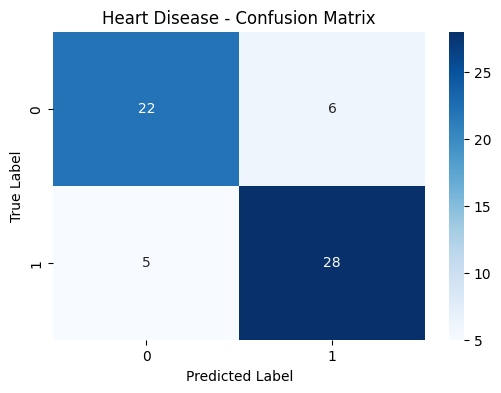


Running SVM classifier for Diabetes...

--- SVM Validation Report for Diabetes ---
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154

Validation Accuracy: 0.7208

--- SVM Test Report for Diabetes ---
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       101
           1       0.69      0.51      0.59        53

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

Test Accuracy: 0.7532


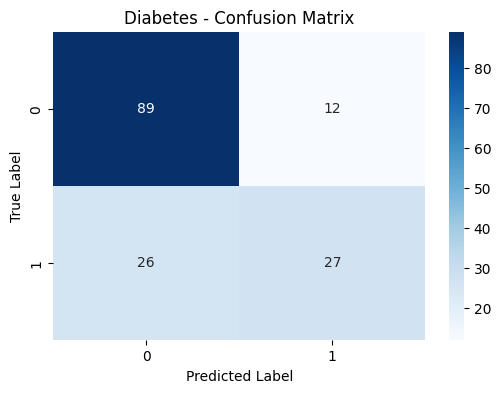

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def svm_disease_classifier(train_data, val_data, test_data, label_column, dataset_name="Dataset"):
    print(f"\nRunning SVM classifier for {dataset_name}...")

    try:
        # Drop missing values
        train_data = train_data.dropna()
        val_data = val_data.dropna()
        test_data = test_data.dropna()

        # Separate features and labels
        X_train = train_data.drop(columns=[label_column])
        y_train = train_data[label_column]
        X_val = val_data.drop(columns=[label_column])
        y_val = val_data[label_column]
        X_test = test_data.drop(columns=[label_column])
        y_test = test_data[label_column]

        # Use only numeric columns
        X_train = X_train.select_dtypes(include=["number"])
        X_val = X_val[X_train.columns]
        X_test = X_test[X_train.columns]

        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        X_test_scaled = scaler.transform(X_test)

        # SVM model
        clf = SVC(kernel='rbf', C=1.0, gamma='scale')
        clf.fit(X_train_scaled, y_train)

        # Evaluate on validation set
        val_pred = clf.predict(X_val_scaled)
        print(f"\n--- SVM Validation Report for {dataset_name} ---")
        print(classification_report(y_val, val_pred))
        print(f"Validation Accuracy: {accuracy_score(y_val, val_pred):.4f}")

        # Final evaluation on test set
        y_pred = clf.predict(X_test_scaled)
        print(f"\n--- SVM Test Report for {dataset_name} ---")
        print(classification_report(y_test, y_pred))
        print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

        # Confusion matrix for the test set
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{dataset_name} - Confusion Matrix")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

    except Exception as e:
        print(f"Error during SVM classification for {dataset_name}: {e}")


svm_disease_classifier(heart_train, heart_val, heart_test, "target", "Heart Disease")
svm_disease_classifier(diabetes_train, diabetes_val, diabetes_test, "Outcome", "Diabetes")
